In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Breast Cancer Diagnosis

In [2]:
# load the Breast Cancer Wisconsin Data Set
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/cancer.csv'
data = pd.read_csv(url)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_points_largest,symmetry_largest,fractal_dimension_largest
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Features are computed from a digitized image (like the one below) of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

<!-- image from images folder -->
<img src="Images/cancer_cells.png" width="200">

Attribute Information:

- 1) Diagnosis (1 = malignant, 0 = benign)
- 2-31) Ten real-valued features are computed for each cell nucleus:
    - a) radius (mean of distances from center to points on the perimeter)
    - b) texture (standard deviation of gray-scale values)
    - c) perimeter
    - d) area
    - e) smoothness (local variation in radius lengths)
    - f) compactness (perimeter^2 / area - 1.0)
    - g) concavity (severity of concave portions of the contour)
    - h) concave points (number of concave portions of the contour)
    - i) symmetry
    - j) fractal dimension ("coastline approximation" - 1)

    The mean, standard deviation and  largest  of these features were computed for each image,
    resulting in 30 features.

**Part 1:** Import and instantiate a logistic regression model

In [10]:
# your code here
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)

**Part 2:** Define the feature matrix X and the target vector y from the dataframe, and then split X and y into training and testing sets.

In [11]:
# your code here
from sklearn.model_selection import train_test_split

X = data.drop('diagnosis',axis=1)
y = data.diagnosis

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

**Part 3:** Train the model on the training data

In [13]:
# your code here
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

**Part 4:** Use the test set to plot the precission vs recall curve, and the precission and recall curves

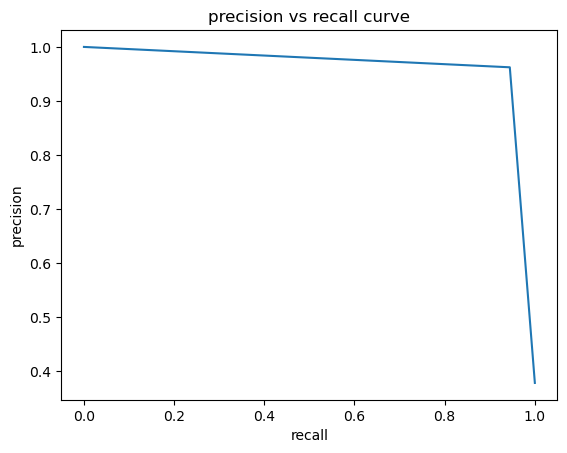

In [15]:
# your code here
y_pred = log_reg.predict(X_test)

# plot precision vs recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision vs recall curve')
plt.show()

**Part 5:** Use the test set to plot the ROC curve

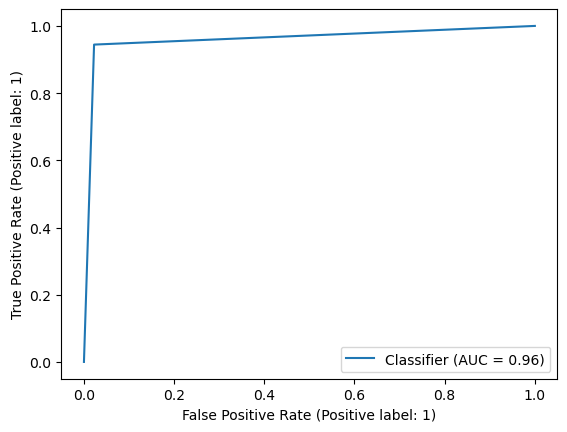

In [18]:
# your code here
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)